In [1]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
%matplotlib inline
from graph import *

# Review of graphs and adjacency matrices

How can we write the graph below as an adjacency matrix? 

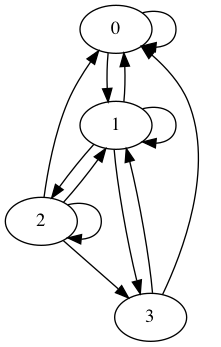

In [2]:
make_graph_adj_random(4)

Remember that:

$A_{ij} = 1$ if the node $j$ has an outgoing edge (arrow) going to node $i$ 

$A_{ij} = 0$ otherwise

Hence the rows indicate incoming edges to a specific node and columns indicate outgoing edges from a specific node.

Write the adjacency matrix A of the above graph:

You can call the helper function:
```python    
graph.graph_matrix(mat, mat_label=None, show_weights=True, round_digits=3)
# mat: 2d numpy array of shape (n,n) with the adjacency matrix
# mat_label: 1d numpy array of shape (n,) with optional labels for the nodes
# show_weights: boolean - option to display the weights of the edges
# round_digits: integer - number of digits to display when showing the edge weights
```
to check if you get the same graph. Since in this example all the edge weights are zero, you should use `show_weights=False`

# Transition matrices

### Using graphs to represent the transition from one state to the other

After collecting data about the weather for many years, you observed that the chance of a rainy day occurring after one rainy day is 50% and that the chance of a rainy day after one sunny day is 10%. 

The graph that represents the transition from the weather on day 1 to the weather on day 2 can be expressed as an adjacency matrix, where the edge weights are the probabilities of weather conditions. We call that the transition matrix.

Write the transition matrix ${\bf A}$ for the weather observation described above, and use the helper function to plot the graph. Your graph will look better if you assign the labels for your nodes, for example, use the label `['sunny','rainy']`


### Properties of a transition (Markov) matrix

- $A_{ij}$ entry of a transition matrix has the probability of transitioning from state $j$ to state $i$

- Since the entries are probabilities, they are always non-negative real numbers, and the columns should add up to one.


### The weather today is sunny. What is the probability of sunny day tomorrow?

The answer to this question is quite trivial, and in this example, we can directly get that information from the graph.
But how could we obtain the same as a matrix-vector multiplication?

Write the numpy array ${\bf x0}$ representing the current state, which is the weather today. Your vector should be consistent with the transition matrix. If the first column of ${\bf A}$ corresponded to transitioning **from** a sunny day, the first entry of the state vector should be sunny.

You can now obtain the probabilities for tomorrow weather by performing a matrix-vector multiplication:

### The weather today (Thursday) is sunny. What is the probability of rain on Sunday? Should I keep my plans for a barbecue?

### What is the probability of sunny days in the long run? 

Let's run power iteration for the equivalent of 20 days. We will store all the state vectors ${\bf x}$ as columns of a matrix, so that we can plot the results later.

We will store all iterations in `allx` in order to view the running probabilities later.

In [9]:
its = 20
allx = np.zeros((2,its))

We will start with the initial state of rainy day:

In [10]:
x = np.array([0,1])
allx[:,0] = x

What are the probabilities after 20 days?

Probabilities of initial state: [0. 1.]
Probabilities after 20 days: [0.83333331 0.16666669]


Text(0.5, 0, '')

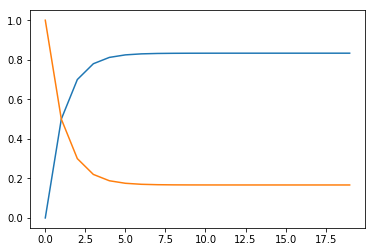

In [12]:
print('Probabilities of initial state:', allx[:,0])
print('Probabilities after 20 days:', allx[:,-1])
plt.plot(allx.T)
plt.xlabel('')

What if we were to start with a random current state? Would the weather probabilities change in the long run? Write a similar code snippet, but now starting at a random initial state. Remember that the sum of the probabilities has to be equal to 1 (or that columns and state vectors should sum to 1). Think about normalizing. Which norm would satisfy this property?

Probabilities of initial state: [0.73214645 0.26785355]
Probabilities after 20 days: [0.83333333 0.16666667]


Text(0.5, 0, '')

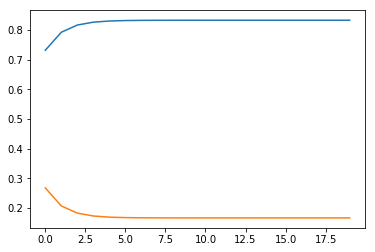

In [14]:
print('Probabilities of initial state:', allx[:,0])
print('Probabilities after 20 days:', allx[:,-1])
plt.plot(allx.T)
plt.xlabel('')

You can run your code snippet above a few times. What do you notice?

### Summarizing:

- You started with an initial weather state ${\bf x_0}$.

- Using the transition matrix, you can get the weather probability for the next day: ${\bf A  x_0} = {\bf x_1}$.

- In general, you can write ${\bf A  x_n} = {\bf x_{n+1}}$.

- Predictions for the weather on more distant days are increasingly inaccurate.

- Power iteration will converge to a **steady-state** vector, that gives the weather probabilities in the long-run.

$${\bf A  x^*} = {\bf x^*}$$

- ${\bf x^*}$ is the long-run equilibrium state, or the eigenvector corresponding to the eigenvalue $\lambda = 1$.

- This steady-state condition ${\bf x^*}$ does not depend on the initial state.

# Example 2: What are students doing during CS 357 lectures?

Consider the following graph of states. Assume this is a model of the behavior of a student after 10 minutes of a lecture. For example, if a student at the beginning of a lecture is participating in the class activity, there is a probability of 20% that they will be surfing the web after 10 minutes.

<img src="StudentLecture.png" alt="Sparse" style="width: 500px;"/>

Write the transition matrix ${\bf A}$ corresponding to the graph above. Build your matrix so that the columns are given in the following order:
```python
activity_names = ['lecture', 'web', 'hw', 'text']
```
Plot the graph using the `graph_matrix` helper function, to make sure you are indeed building the correct matrix. You can use the list above to label the nodes. 

Build the initial state vector ${\bf x}$. Recall that this array should follow the same order as the matrix, here defined in `activity_names`.  In the initial state (suppose that we are at the 0 minute mark of the lecture, i.e. the beginning of the lecture), students have an 80% probability of participating in lecture, 10% probability of texting friends and 10% probability of surfing the web. 

What is the probability that students will be working on their HW after 10 minutes?

What is the probability that students will be sending text messages after 30 minutes?

Would your answer above change if you were to start from a different initial state? Try for example x0 = [0, 0.2, 0.1, 0.7].

Steady-state will not depend on the initial state, but before achieving steady-state, the probabilities will be different!

Get the steady-state for this problem:
- Start from a random initial state. 
- Make sure the probability of the initial state sums to 1. 
- Assume 20 iterations of power method

In [20]:
its = 20
allx = np.zeros((4,its))

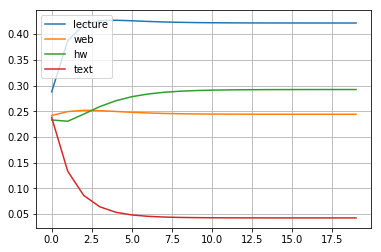

In [22]:
plt.plot(allx.T)
plt.legend(activity_names)
plt.grid()

Do you think you achieved steady-state at iteration 40?

Note that iteration 40 corresponds to the 400th minute of a lecture, which in this case does not exist (luckily? :-))

Does the class achieve steady-state at the end of lecture (about 70 minutes or 7 steps)?

Use `numpy.linalg.eig` to see how the steady-state (solution of power iteration) is the eigenvector of ${\bf A}$ corresponding the the eigenvalue 1. The eigenvectors are given in the columns of ${\bf U}$.

In [23]:
lambdas, U = la.eig(A)
print(lambdas)
print(U[:,0])

[1.         0.26339746 0.6        0.43660254]
[0.7402746  0.42830173 0.51290455 0.07402746]


Not what you expected? Remember that if ${\bf u}$ is an eigenvector of ${\bf A}$, then $\alpha {\bf u}$ is also en eigenvector. Can you show that the eigenvector from the power iteration solution is the same as the one obtained using `numpy.linalg.eig`?

# Example 3: Page Rank

Suppose we have 6 different websites that we want to rank. They appear in the dictionary `name_mapping`, that indicates the website string name for each node in the graph (or position in the transition matrix).

In [25]:
name_mapping={0:'Google', 1:'Facebook', 2:'Amazon', 3:'Wikipedia', 4:'Twitter', 5:'YouTube'}

The list `edges` contains the outgoing link information. Each list entry `[x,y]` indicates that a node x (or website x) has a link to node y (or website y). The code snippet below construct the adjacency matrix, and plots the corresponding graph.

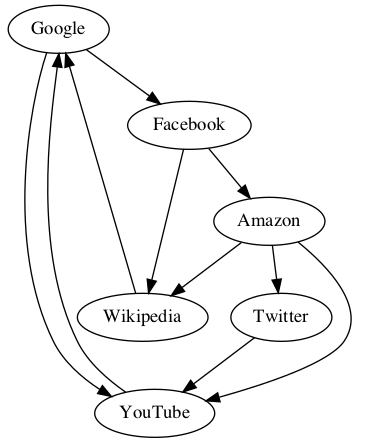

In [30]:
edges = [
    [0,1], [0,5],
    [1,2], [1,3],
    [2,3], [2,4], [2,5],
    [3,0],
    [4,5],
    [5,0]]

A = np.zeros((6,6))
for i, j in edges:
    A[j, i] = 1

graph_matrix(A, list(name_mapping.values()), show_weights=False)

### Definition of the **PageRank model**:

 “PageRank can be thought of as a model of user behavior. We assume there is a random surfer who is given a web page at random and keeps clicking on links, never hitting “back”…”
 
 http://infolab.stanford.edu/~backrub/google.html


 Let's put numbers to the statement above and see how it applies to the example above. Suppose a random surfer is initially at website 0. His initial state would be:

[1,0,0,0,0,0]

The web surfer will click on links on current websites, and he will keep doing this until achieving steady-state (he will never hit "back button"). So for the example above, if he is on the Google website, he will either be going to Facebook or YouTube next. Since there are two links, we will assume that each website has the same probability of being the next one, so there is a probability of 50% he will go to Facebook and 50% he will go to YouTube.

We now need to modify the adjacency matrix above in order to get a matrix that satisfy the properties of the Markov matrix, specifically the one that the column sum is equal to 1 (here representing the probabilities of the outgoing links).

Here is what your adjacency matrix looks like:

In [31]:
A

array([[0., 0., 0., 1., 0., 1.],
       [1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [1., 0., 1., 0., 1., 0.]])

How should you change the matrix `A`, to model the behavior described above? Make the Markov matrix M.

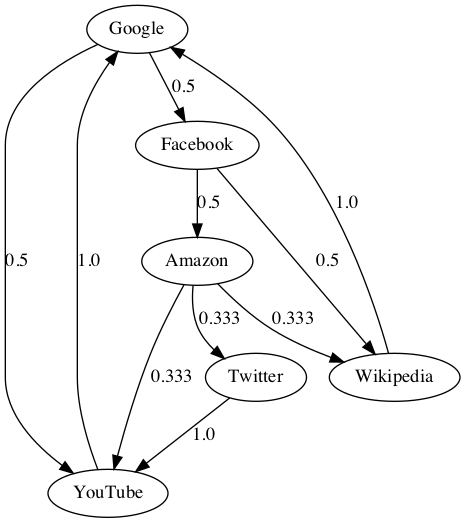

In [34]:
graph_matrix(M, list(name_mapping.values()))

Get the steady-state for this problem:
- Start from a random initial state. 
- Make sure the probability of the initial state sums to 1. 
- Assume 20 iterations of power method

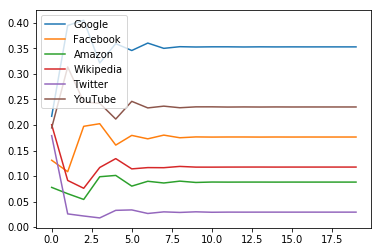

In [36]:
plt.plot(allx.T)
plt.legend(list(name_mapping.values()))

At steady-state, what is the most likely page the user will end up at, when starting from a random page?

Creating the list of strings `ranking` with the rank of the websites (the string names), starting from the mostly likely the user will end up at, to the least likely. 


### What happens when the web surfer ends up in a website without any outgoing link? 

Let's repeat the example above, with a simple change to the outgoing links. Page 5 (YouTube) no longer has an outgoing link.

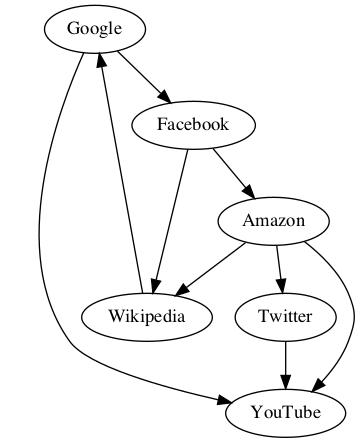

In [38]:
edges = [
    [0,1], [0,5],
    [1,2], [1,3],
    [2,3], [2,4], [2,5],
    [3,0],
    [4,5]]

A = np.zeros((6,6))
for i, j in edges:
    A[j, i] = 1

graph_matrix(A, list(name_mapping.values()), show_weights=False)

Note that you can no longer use the method above to obtain the Markov matrix, since the sum of the fifth column is now zero.

In [39]:
A

array([[0., 0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [1., 0., 1., 0., 1., 0.]])

### Once the web surfer reaches a page without outgoing links, we can assume that he will not stay on that webpage forever!

We then assume that the web surfer will move to any of the other webpages with equal probability. Construct the Markov matrix using this assumption.

Get the steady-state for this problem:
- Start from a random initial state. 
- Make sure the probability of the initial state sums to 1. 
- Assume 20 iterations of power method

Did your ranking changed?

### One remaining issue!

The Markov matrix does not guarantee a unique solution! Let's take a look at this example:

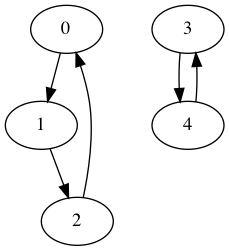

In [43]:
B = np.array([[0,0,1,0,0],[1,0,0,0,0],[0,1,0,0,0],[0,0,0,0,1],[0,0,0,1,0]])
graph_matrix(B,  show_weights=False)

The matrix `B` has two eigenvectors corresponding to the same eigenvalue of 1.

In [44]:
l,v = la.eig(B)
print('The eigenvalues are:')
print(l)

The eigenvalues are:
[-0.5+0.8660254j -0.5-0.8660254j  1. +0.j         1. +0.j
 -1. +0.j       ]


Some of the eigenvalues are complex, but we are interested in the two eigenvectors corresponding to the eigenvalue 1.

In [45]:
v[:,2]/la.norm(v[:,2],1)

array([-0.33333333+0.j, -0.33333333+0.j, -0.33333333+0.j,  0.        +0.j,
        0.        +0.j])

In [46]:
v[:,3]/la.norm(v[:,3],1)

array([0. +0.j, 0. +0.j, 0. +0.j, 0.5+0.j, 0.5+0.j])

Hence both
$$
{\bf x^*} = \begin{bmatrix}
    0 \\
    0 \\
    0 \\
    0.5 \\
    0.5
\end{bmatrix}
\qquad \textrm{and} \qquad 
{\bf x^*} = \begin{bmatrix}
    0.33 \\
    0.33 \\
    0.33 \\
    0 \\
    0
\end{bmatrix}
$$
are possible solutions!

#### Perron-Frobenius theorem (CIRCA 1910):
If ${\bf M}$ is a Markov matrix with ***all positive entries***, then ${\bf M}$  has unique steady-state vector ${\bf x}^*$.

### Definition of the **PageRank model** (complete):

“PageRank can be thought of as a model of user behavior. We assume there is a random surfer who is given a web page at random and keeps clicking on links, never hitting 'back', but **eventually gets bored and starts on another random page**."
 
To model the behavior of a web surfer getting bored, the proposed **Google matrix** is defined as:
 
 
 $$ G = \alpha \, {\bf M} + (1-\alpha) \,\frac{1}{n} \mathbf{1} $$
 
 
where $\mathbf{1}$ is a matrix of ones with same dimension $n$ as the Markov matrix ${\bf M}$. We divide $\mathbf{1}$ by $n$ to enforce that the columns sum to 1. In this model, a  web surfer clicks on a link on the current page with probability $\alpha$ and opens a random page with probability $(1-\alpha)$, where $0< \alpha < 1$. A typical value for $\alpha$ is $0.85$. 
Note that the Google matrix ${\bf G}$ has all entries greater than zero, and guarantees a unique solution.



Construct the Google matrix ${\bf G}$ for the Markov matrix above, using $\alpha = 0.85$:

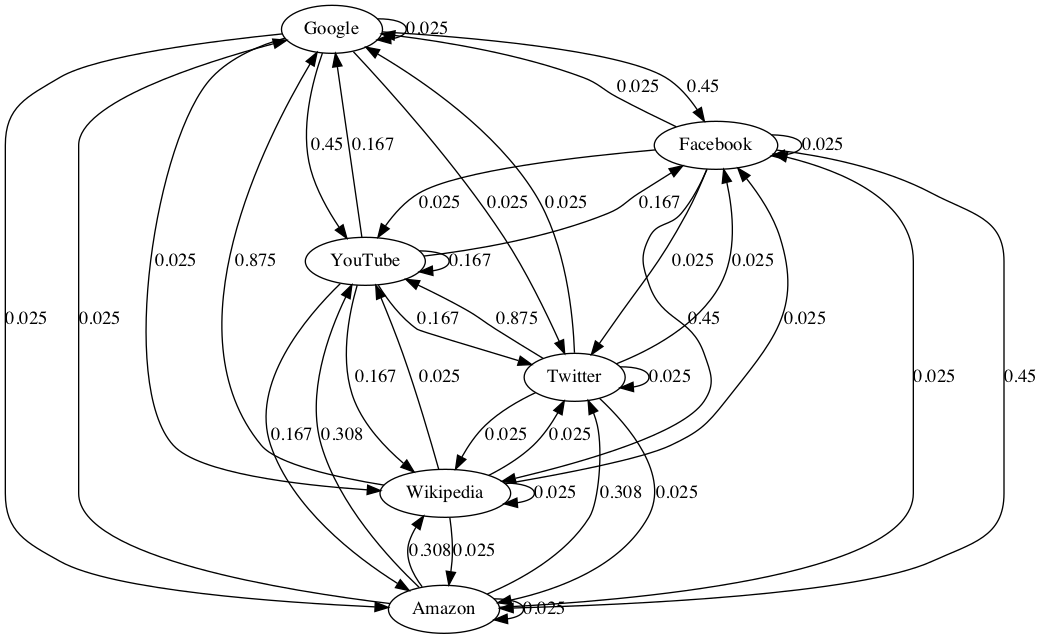

In [49]:
graph_matrix(G, list(name_mapping.values()))

Get the steady-state for this problem:
- Start from a random initial state. 
- Make sure the probability of the initial state sums to 1. 
- Assume 20 iterations of power method

### Overall complexity of PageRank problem

In general, for the dense Google matrix with shape $(n,n)$, the cost of each matrix-vector multiplication during the power iteration method would be $O(n^2)$. 

$$ {\bf x}_{i+1} = {\bf G \, x}_{i} $$


In a PageRank problem, $n$ is very large! But let's look at each part of the Google matrix:

 $$ {\bf G} = \alpha \, {\bf M} + (1-\alpha) \,\frac{1}{n} \mathbf{1} $$
 
The Markov Matrix for the PageRank problem will likely be very sparse, since webpages will only have a few number of outgoing links. Hence, the calculation 

$$ {\bf x}_{i+1} = {\bf M \, x}_{i} $$

will take advantage of sparse operations, which can be in general approximated with $O(n)$ complexity.

We need to look at the complexity of performing

$$ {\bf x}_{i+1} = \mathbf{1} \, {\bf x}_{i} $$

Since $\mathbf{1}$ is a dense matrix, some would quickly jump to the conclusion that the complexity is $O(n^2)$. But it is not! Can you think of how this operation can be done efficiently?




